### Quick announcement

First of all, thank you for all of your great work! We are finalizing the grades for the Stochastic Parrots reaction paper and your grade should be available (unless you asked for an extension) by Thursday.

# Learning linguistic regularities

While language data are highly unstructured, language itself _is_ highly structured. Generally, if we are thinking statistically, we can think of how language is _distributed_.

A _distribution_ is about how linguistic events -- such as sounds, words, elements of a story or narrative -- appear and when they appear.

<img src="https://upload.wikimedia.org/wikipedia/commons/3/3e/Dirichlet_distributions.png" alt="Picture of four different Dirichlet distributions" width=400/>

Language is structured in a systematic way. That is, words do not appear in random locations, and words do not occur with just any other words. The non-randomness of language is what allows us to learn from text data with statistical models.

Here are some of the ways that language is structured that we can leverage for natural language processing applications:

* Grammatical rules
  * There are grammatical dependencies between words (e.g., **subject-verb agreement**; we say "bananas are" and "banana is", but not "bananas is")
  * In some languages like Spanish, there other agreement systems, including between nouns (things) and adjectives (modifiers). For example, "**la** cas**a** pequeñ**a**" versus "**el** gat**o** pequeñ**o**."
* Word forms
  * Words often sound like other words that mean similar thing (e.g., "clap", "clack", "clang")
  * The way we pronounce words (e.g., louder, with a higher pitch, by emphasizing certain sounds) can tell us what the speaker means (e.g., "Click on the BLUE bat" versus "Click on the blue bat.")
* Word orders are often very predictable
  * Some languages, like English, mostly rely on word order to express grammatical relationships (e.g, who did what to whom)
  * Other languages, like Turkish, use word _forms_ in the form of _morphology_ to express grammatical relationships, in addition to word order
* Words typically occur with related words
  * If we are talking about cats, other types of pets may come up
  * The types of ways we talk about cats and dogs are similar

## Order in language data really matters

Compare the following two sequences of words:

1. all of a sudden I notice three of my pals standing on the sidewalk
2. on pals all I of notice sidewalk of three a sudden my standing the

It is easy to show that the count statistics of individual tokens will be identical between (1) and (2), even though (2) is scrambled. 

```python
# The two of these will have identical word frequency distributions
# frequencies of normal sentence
(Counter(word_tokenize("all of a sudden I notice three of my pals standing on the sidewalk"))==
# frequencies of scrambled sentence
 Counter(word_tokenize("on pals all I of notice sidewalk of three a sudden my standing the")))
```
will output
```
True
```

However, one of the texts is sensical and a "better" instance of an English sentence. Therefore, we want a **language model** that can best account for language data. 

One of the major approaches of NLP in the last 30 years has been to better understand how to characterize how much a computer can "understand" by focusing on its ability to "model" the language it experiences. Usually, this is quantified using _probabilities_.

* <u>Linking assumption</u>: The greater _probability_ (likelihood) a model assigns to an utterance, the better it knows the language we are asking it to process.

#### This means that we need to learn or know as many factors as possible that affect why language data looks like it does.

# Language Modeling

Most commonly, a **language model** is any system that can accurately characterize the way languages look. A language model is NOT a model of language per se -- it will always be incomplete. Most commonly, language models are _statistical_ and learn from observations of words in text corpora. However, language models can be trained over all kinds of linguistic entities, such as the sounds within words, and have [even been applied to genetic sequences](https://github.com/rostlab/SeqVec).

Remember the dictionaries that we created? These stored counts of individual words and bigrams and are among the simplest kinds of language model. This is because we can easily translate the **counts** into **probabilities** as below:

<center>$p(word==w) = \large \frac{count(w)}{\sum_{w_i}count(w_i)}$</center>

This statistic is known as the **unigram probability** of a word, or its **unconditional** probability -- that is, when we don't know _anything_ about when that word occurs, we say that it is not **conditioned** on anything.

When we calculate more complex statistics -- such as the frequency of two words co-occurring one after the other (e.g., _parsing algorithms_) -- we are interested in the **joint probability** because we have multiple events that we are combining. The joint probability of two words co-occurring in a particular order is known as a **bigram probability** and can be characterized as follows:

<center>$p(w_1==\text{"parsing"} \cap word_2==\text{"algorithms"})$ = $\large \frac{count(w_i w_{i+1})}{ \sum_{w_{i}} \sum_{w_{i + 1}} w_i w_{i + 1}}$
</center>

So, if we count up the number of pairs of words we observe, we can get a _bigram probability_. This is analogous to the classic problem in probability in which a coin is tossed and we want to know what the chances are of getting "heads" followed by "tails" or if two dice are rolled and how often we see a 1 and a 6.

In [1]:
#@title Default title text
import plotnine
from plotnine import *
import pandas as pd
import numpy as np

# load in standard stuff
from google.colab import files, drive
from collections import Counter
from nltk import word_tokenize
import nltk
nltk.download("punkt")

drive.mount("/content/drive/")
abstracts = open(
    ("/content/drive/MyDrive/Teaching/Fall2021/Computational"
    " Linguistics/Lectures/supplementary_files/abstracts.tsv"), 'r').readlines()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
Mounted at /content/drive/


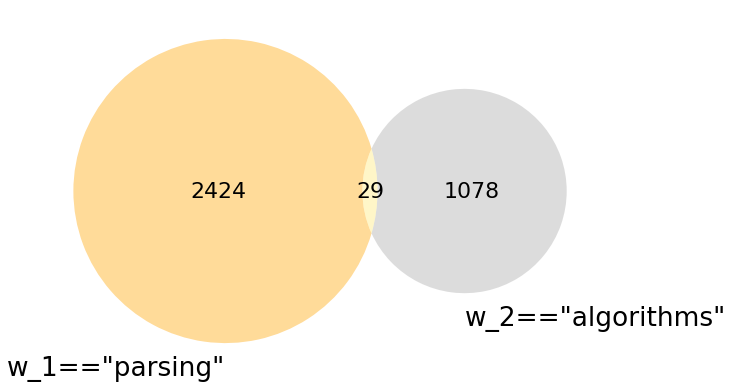

In [2]:
#@title We can basically think of bigram frequencies as a Venn diagram:

import matplotlib.pyplot as plt
from matplotlib_venn import venn2
plt.figure(figsize=(10,10))
font = {'family' : 'Sans',
        'weight' : 'normal',
        'size'   : 22}
plt.rc('font', **font)

# Use the venn2 function
venn2(subsets = (2424, 1078, 29),
      set_labels = ('w_1=="parsing"', 'w_2=="algorithms"'),
      set_colors=('orange', 'darkgray'))
plt.show()

In [2]:
# we can compute bigram probabilities the same way as single-word frequencies
bigram_counts = {}
for abstract in abstracts:
  tokenized_abstract = word_tokenize(abstract)
  for i, word in enumerate(tokenized_abstract):
    # if this looks unfamiliar, look at the September 13th lesson
    if i < (len(tokenized_abstract) - 1):
      next_word = tokenized_abstract[i + 1]
      # has to be a tuple because we need immutable objects as keys
      bigram_tuple = (word, next_word)
      if bigram_tuple not in bigram_counts:
        bigram_counts[bigram_tuple] = 1
      else:
        bigram_counts[bigram_tuple] += 1

# show the top 10 bigrams by frequency
print(list(sorted(bigram_counts.items(),
                  key=lambda item: item[1], reverse=True))[0:10])
# show a set of 10 more middle frequency bigrams
print(list(sorted(bigram_counts.items(),
                  key=lambda item: item[1], reverse=True))[5500:5510])

[(('{', "\\'e"), 26340), (("\\'e", '}'), 26340), (('.', 'We'), 24395), ((',', 'we'), 23086), (('of', 'the'), 21113), ((',', 'and'), 17273), (('.', 'The'), 15887), (('{', "'"), 14748), (("'", '}'), 14748), (('.', 'In'), 12767)]
[(('for', 'sentence'), 84), (('that', 'generates'), 84), (('entity', 'and'), 84), (('paired', 'with'), 84), (('-', '{'), 84), (('augmented', 'with'), 84), (('The', 'code'), 84), (('lexical', 'units'), 84), ((',', 'models'), 84), (('the', 'novel'), 84)]


(-0.5, 399.5, 199.5, -0.5)

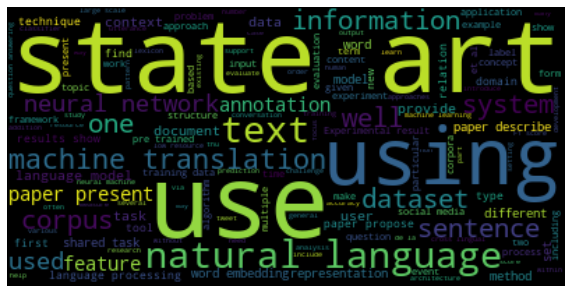

In [4]:
#@title Wordcloud and the bag-of-words
from wordcloud import WordCloud
plt.figure(figsize=(10,10))
wordcloud = WordCloud().generate(
        '\n'.join([x for x in abstracts]))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# The bag-of-words

Sometimes, we want to use a representation of a text that contains estimates of its contents. The simplest representation is known as the **bag of words**. 

<img src="" alt="A bag containing words" />

The bag of words is a representation that basically looks exactly like a dictionary. It applies at the level of a document, which could be a single sentence, a single paragraph, a book chapter, a novel, etc. All we need is a tokenized representation of a document (`tokenized_document`) and a `vocabulary` of words that are valid words for our model.

The representation can be specified like this:

```python
def bag_of_words(tokenized_document: list, vocabulary: set):
  bag = {}
  counts = Counter(tokenized_document)
  # set up the bag of words
  # all words are assumed to start with 0
  for word in vocabulary:
    bag[word] = 0
  # update the counts based on what is in Counter
  for token in tokenized_document:
    if token in vocabulary:
      bag[token] = counts[token]
    else:
      pass
  return bag
```

This is basically a tiny language model -- it produces counts that we can then use in a downstream task.

## How is a dictionary also a vector representation?
Every word in the dictionary has an index. We can arbitrarily map any dictionary `key` to a unique numerical `value`. If we constrain each `value`s to correspond to an index in a list, we can transform any dictionary of word counts into a vector.

### An algorithm for constructing a bag of words vector

We can then transform the "bag" into a vector representation in which all words are associated with one dimension, populated with 0s. Then, we fill in counts for all the words (dimensions) that are actually in the document. This would work something like this:

```python
def bag_of_words_vector(bag: dict, vocabulary: set):
  # create a vector -- approximate using a list
  bow_vector = []
  # loop through our fixed vocabulary
  # this will "fix" all the dimensions
  for word in vocabulary:
    word_frequency = bag[word]
    vector.append(word_frequency)
  return bow_vector
```

A **bag-of-words model** is any model where we use bag-of-words representations. While these are not the focus of this course, these models are the _gold standard_ for comparison in almost any text-based machine learning application. Your model should always be able to out-perform the bag-of-words. We will be talking about applications of the representations throughout this course.

In [3]:
def bag_of_words_vector(bag: dict, vocabulary: set):
  # create a vector -- approximate using a list
  bow_vector = []
  # loop through our fixed vocabulary
  # this will "fix" all the dimensions
  for word in vocabulary:
    word_frequency = bag[word]
    bow_vector.append(word_frequency)
  return bow_vector

# define dimensions for vectors as each word
words = []
for abstract in abstracts:
  words += word_tokenize(abstract)
vocabulary = set(words)

# build a vector for the very first abstract
# we expect to see a ton of 0s
bag_of_words_vector(bag=Counter(word_tokenize(abstracts[0])),
                    vocabulary=vocabulary)[0:100]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [4]:
# in first abstract, what proportion of all words have non-zero values?
bow_first_abstract = bag_of_words_vector(
    bag=Counter(word_tokenize(abstracts[0])),
    vocabulary=vocabulary)

# convert our existing array into an array of only 0s and 1s
nonzero = [x > 0 for x in bow_first_abstract]

number_nonzero_for_abstract = sum(nonzero)
vocabulary_size = len(vocabulary)

print(f"probability of non-zeros (proportion with values > 0):"
      f" {number_nonzero_for_abstract / vocabulary_size}")

probability of non-zeros (proportion with values > 0): 0.0011412268188302425


## Zipf's Law and sparsity

Language data is distributed in a very "concentrated" or predictable way. While we do not always know what someone is going to say next, we can generally make a pretty good guess and not be too far off. Language is much more predictable than, say, coin flips or dice rolls. The non-randomness of language can be seen by analyzing how "peaky" several distributions that we use to analyze corpora are. The most important of these distributions is the [Zipf-Mandelbrot distribution](https://en.wikipedia.org/wiki/Zipf%E2%80%93Mandelbrot_law)). Below are three visualizations of the Zipf-Mandelbrot Law below. The first and second graphs are applied to the frequencies of individual words, while the third graph is applied to bigram frequencies.

In all three cases, we can see that very few bigrams occur very many times, and many bigrams occur very few times. This apparent trade-off is seen in many other domains with complex co-occurrence data, such as the prevalence of different species in a natural area, how popular a song is and how many people have listened to it, etc. 

These extremely rare events can cause a major problem for NLP because sometimes:

1. They are a nuisance (for example, they may be typos)
2. They are exactly what we want to know (they uniquely characterize a text)

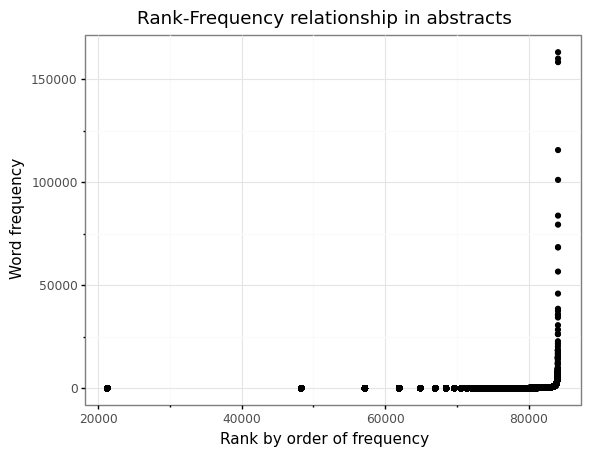

<ggplot: (8781812242861)>


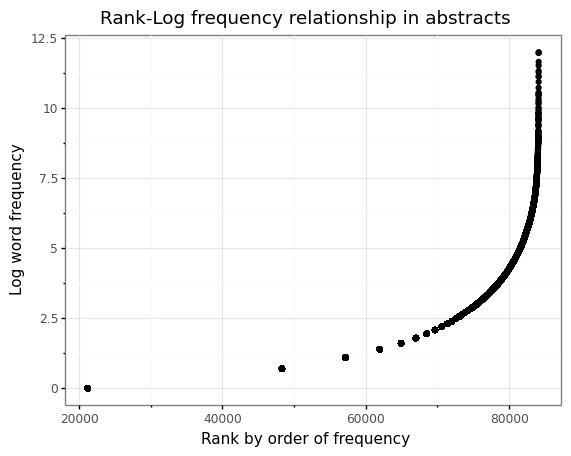

<ggplot: (8781797419241)>


In [7]:
#@title A visualization of distributions of count statistics

def visualize_count_stats(abstracts):
  words = []
  for abstract in abstracts:
    words += word_tokenize(abstract)

  counts_of_words = Counter(words)
  counts_df = pd.DataFrame.from_dict(
      counts_of_words, orient='index',
      columns=['count']).reset_index()

  print(ggplot(counts_df, aes(x='count.rank()', y='count'))
        + geom_point()
        + xlab("Rank by order of frequency")
        + ylab("Word frequency")
        + ggtitle("Rank-Frequency relationship in abstracts")
        + theme_bw())
  print(ggplot(counts_df, aes(x='count.rank()', y='np.log(count)'))
        + geom_point()
        + xlab("Rank by order of frequency")
        + ylab("Log word frequency")
        + ggtitle("Rank-Log frequency relationship in abstracts")
        + theme_bw())

visualize_count_stats(abstracts)

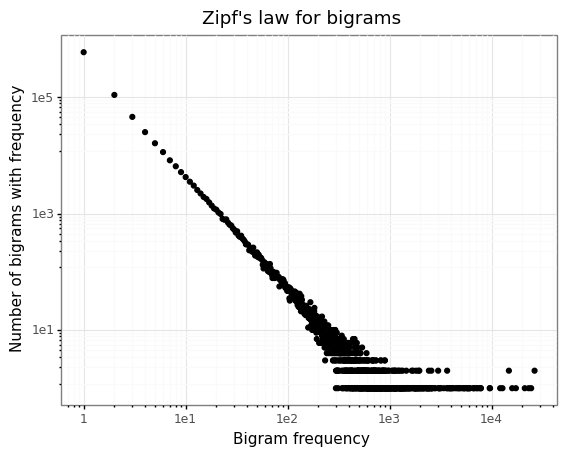

<ggplot: (8781795815733)>

In [8]:
#@title 
bigram_counts_df = pd.DataFrame.from_dict(
    bigram_counts, orient='index', columns=['count']
    ).reset_index()
zipf_counts = bigram_counts_df.groupby(
    "count").aggregate('count').reset_index()
(ggplot(zipf_counts, aes(x='count', y='index')) + geom_point()
 + scale_x_log10(name="Bigram frequency")
 + scale_y_log10(name="Number of bigrams with frequency")
 + ggtitle("Zipf's law for bigrams")
 + theme_bw())

### For Friday (September 17, 2021)

1. Be sure to check out the HW2 folder on UBLearns. You should at the very least check to make sure you can open the notebook file. Remember, the homework is due Friday September 24, 2021 by midnight and must be submitted as an `.ipynb` file. Some pro tips:
  * If something seems unclear, check back to one of the lecture notebooks to see if there are some helpful close examples.
  * Pay close attention to what the expected output is supposed to be, such as its name, what data structure it has, etc.
  * Post any questions you have to the discord server on \#code-help or \#general (or email [Dr. Jacobs](mailto:cxjacobs@buffalo.edu) or the TA [Liz Soper](mailto:esoper@buffalo.edu)).

2. Keep reading Chapter 3 of Jurafsky and Martin (Speech and Language Processing, 3rd edition). This chapter explains some of the uses of language models, which form the foundation of nearly all statistics we will use from here on out.

3. Brush up on your probability if you need to. There are tons of great resources on places like Khan Academy and Youtube. For more technical explanations, the MacKay book on UBLearns in Supplemental Resources is also an awesome book. Friday is going to build on earlier work this week (smoothing, normalization, and tf-idf). 
